Problem Statement: Use of logistic Regression on Binary class and multiclass dataset


Dataset Description:
    1.Binary class dataset : 
        HR analytics:
        HR Analytics helps us with interpreting organizational data. It finds the people-related trends in the data and allows the HR Department to take the appropriate steps to keep the organization running smoothly and profitably. Attrition in a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.
        Class to classify:Left 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 


In [113]:
df = pd.read_csv("HR.csv")

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

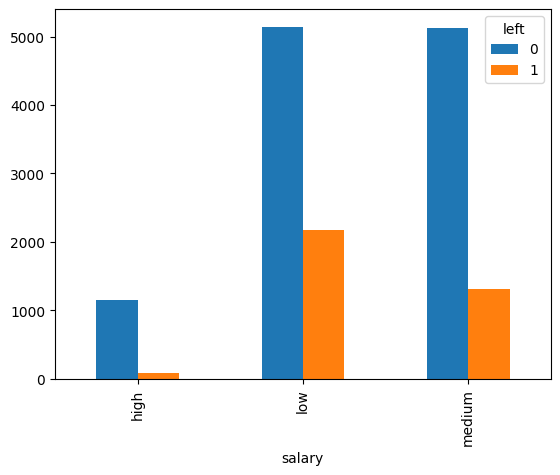

In [62]:
#Analyzing relation between salary and people leaving
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

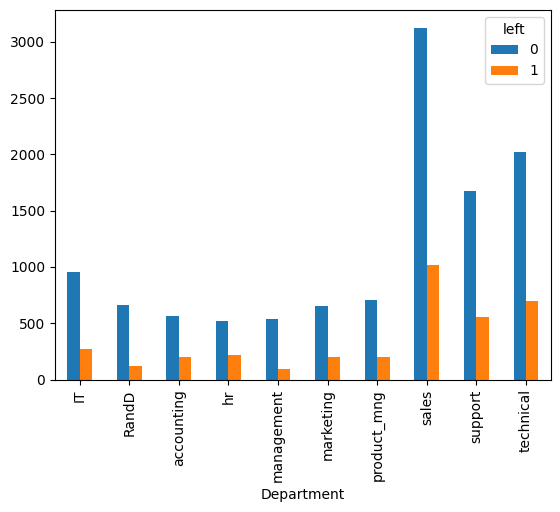

In [64]:
#Similarly for finding the number of people leaving per department
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [16]:
stay = df[df.left==0]

In [ ]:
#Using to find important parameters which directly influence attrition
df.groupby("left").mean()

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import train_test_split

In [73]:
#Extracting the most important parameters for learning
sub_df = df[['satisfaction_level', 
       'average_montly_hours', 
       'promotion_last_5years', 'salary']]
       

In [74]:
sub_df.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [75]:
#Since salary is the only non numeric parameter, we will map it to integers
sub_df.salary = sub_df.salary.map({'high':2,'medium':1,'low':0})

/var/folders/_y/0j159knd0cx37bkfg339nz4h0000gn/T/ipykernel_68498/3412738628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.salary = sub_df.salary.map({'high':2,'medium':1,'low':0})


In [77]:
sub_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [78]:
#x holds the parameters influencing output
x= sub_df

In [79]:
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0


In [80]:
#left=>left=1 , staying=> left = 0
y = df.left

In [82]:
#80:20 rule to train data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [83]:
#Binary classification LR model
model = LogisticRegression()

In [84]:
model.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_predict = model.predict(x_test)

In [89]:
model.score(x_test,y_test)

0.784

In [91]:
from sklearn import metrics


In [93]:
metrics.accuracy_score(y_test,y_predict)

0.784

In [94]:
metrics.roc_curve(y_test,y_predict)

(array([0.        , 0.05463287, 1.        ]),
 array([0.        , 0.26544944, 1.        ]),
 array([2, 1, 0]))

In [99]:
metrics.roc_auc_score(y_test,y_predict)


0.6054082855346901

In [100]:
metrics.precision_score(y_test,y_predict)

0.6019108280254777

In [102]:
metrics.recall_score(y_test,y_predict)

0.2654494382022472

In [114]:
cf = metrics.confusion_matrix(y_test,y_predict)
cf


array([[2163,  125],
       [ 523,  189]])

In [105]:
import seaborn as sns 


<Axes: >

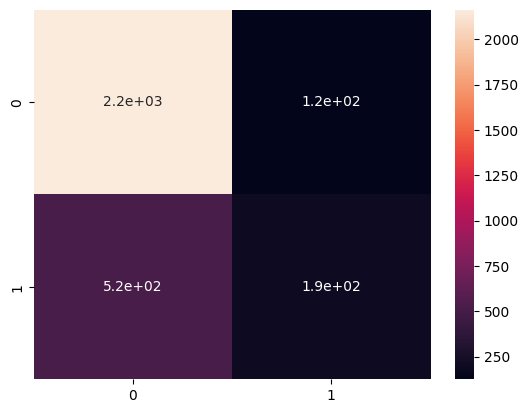

In [107]:
sns.heatmap(cf,annot=True)

<Axes: >

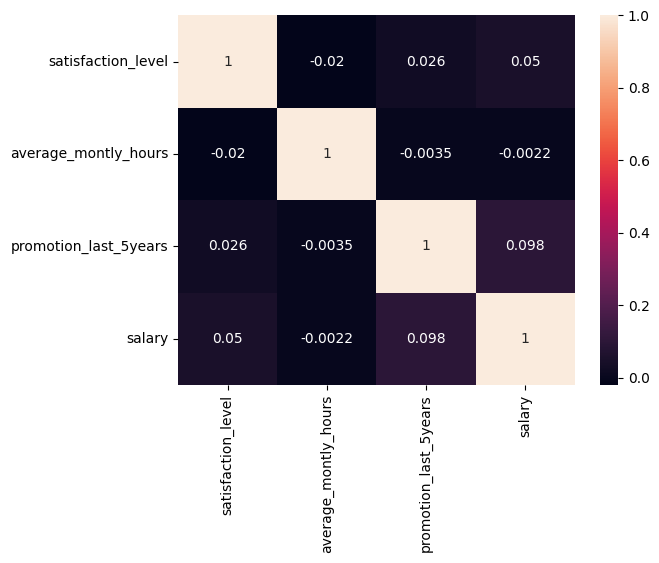

In [109]:
sns.heatmap(sub_df.corr(),annot=True)

In [110]:
from sklearn.model_selection import cross_val_score


In [117]:
c_score = cross_val_score(model,x,y,cv=5)
c_score



array([0.76933333, 0.791     , 0.78733333, 0.77033333, 0.78426142])

In [116]:
c_score.mean()

0.7804522840946981

Text(0, 0.5, 'False Positive Rate')

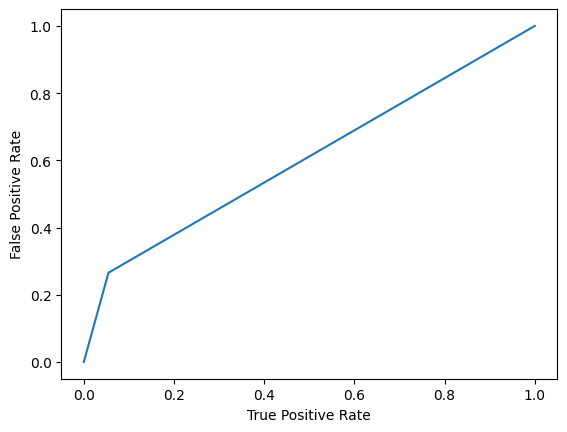

In [119]:
#ROC_AUC CURVES
fpr,tpr,_ = metrics.roc_curve(y_test,y_predict)
auc = metrics.roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')